In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/Dota_Simulator

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/Dota_Simulator')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/12QFJyRnVhjFL-I5c6E5gyBMOyT_jFnQS/Dota_Simulator


In [0]:
import torch
import joblib
import importlib
import warnings
dotasimlib = importlib.import_module("DOTA_simulator")

In [0]:
dotasimlib= importlib.reload(dotasimlib)

In [62]:
sim = dotasimlib.DotaSim()
sim.load_data("games_data/rd_cumulated_*");

4 Files to load
games_data/rd_cumulated_1.csv   	Imported: 13234 lines
games_data/rd_cumulated_2.csv   	Imported: 12884 lines
games_data/rd_cumulated_3.csv   	Imported: 13229 lines
games_data/rd_cumulated_4.csv   	Imported: 25067 lines
64414 Lines in the dataset


In [63]:
sim.set_model('unet')

Using CUDA
Model dimensions: (210, 23) => 210
Model type:
 DotaUNet(
  (input_layer): Input(
    (layer): Linear(in_features=233, out_features=256, bias=True)
  )
  (down1): Down(
    (layer): Linear(in_features=256, out_features=128, bias=True)
  )
  (down2): Down(
    (layer): Linear(in_features=128, out_features=64, bias=True)
  )
  (bottom): Down(
    (layer): Linear(in_features=64, out_features=64, bias=True)
  )
  (up1): Up(
    (layer): Linear(in_features=64, out_features=128, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (concat1): ConcatConv(
    (conv): Conv1d(2, 1, kernel_size=(3,), stride=(1,), padding=(1,))
  )
  (up2): Up(
    (layer): Linear(in_features=128, out_features=256, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (concat2): ConcatConv(
    (conv): Conv1d(2, 1, kernel_size=(3,), stride=(1,), padding=(1,))
  )
  (output_layer): Output(
    (layer): Linear(in_features=256, out_features=210, bias=True)
    (dropout): Dropout(p=0.5, inp

Training...
> 1 	/ 200 	Train Loss: 0.7409  	| Validation Loss: 0.6698
> 2 	/ 200 	Train Loss: 0.6487  	| Validation Loss: 0.6426
> 3 	/ 200 	Train Loss: 0.6314  	| Validation Loss: 0.6315
> 4 	/ 200 	Train Loss: 0.6225  	| Validation Loss: 0.6241
> 5 	/ 200 	Train Loss: 0.6173  	| Validation Loss: 0.6204
> 6 	/ 200 	Train Loss: 0.6139  	| Validation Loss: 0.6173
> 7 	/ 200 	Train Loss: 0.6116  	| Validation Loss: 0.6153
> 8 	/ 200 	Train Loss: 0.6098  	| Validation Loss: 0.6154
> 9 	/ 200 	Train Loss: 0.6096  	| Validation Loss: 0.6154
> 10 	/ 200 	Train Loss: 0.6093  	| Validation Loss: 0.6146
> 11 	/ 200 	Train Loss: 0.6084  	| Validation Loss: 0.6133
> 12 	/ 200 	Train Loss: 0.6082  	| Validation Loss: 0.6122
> 13 	/ 200 	Train Loss: 0.6075  	| Validation Loss: 0.6132
> 14 	/ 200 	Train Loss: 0.6072  	| Validation Loss: 0.6123
> 15 	/ 200 	Train Loss: 0.6073  	| Validation Loss: 0.6125
> 16 	/ 200 	Train Loss: 0.6069  	| Validation Loss: 0.6120
> 17 	/ 200 	Train Loss: 0.6058  	| V

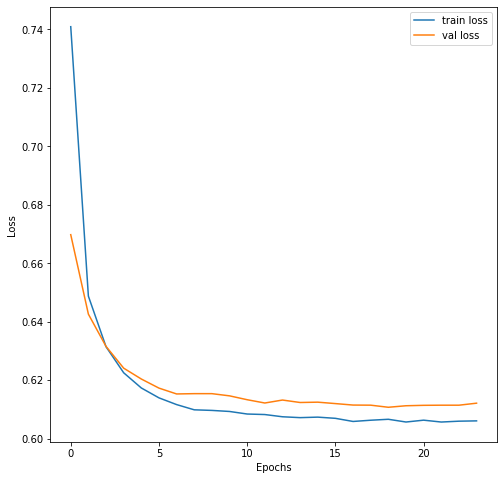

In [64]:
sim.train(epochs=200, batch_size=128, limit_overfit=5)

In [0]:
sim.save_model("trained_model")

In [72]:
import time
t0 = time.time()
sim.reset()
sim.render()
for i in range(100):
    sim.step(0)
    sim.render()
print("Run time: %.2f s" %(time.time()-t0))

Env Reset
0 > Time: 0 | (-6700 , -6700)
1 > Time: 126 | (-6814 , -6585)
2 > Time: 126 | (-2771 , -2560)
3 > Time: 126 | (-2771 , -2296)
4 > Time: 126 | (-2771 , -2560)
5 > Time: 123 | (-2771 , -2560)
6 > Time: 126 | (-2798 , -2606)
7 > Time: 126 | (-2771 , -2560)
8 > Time: 126 | (-2823 , -2560)
9 > Time: 126 | (-2771 , -2602)
10 > Time: 126 | (-2771 , -2560)
11 > Time: 124 | (-2828 , -2560)
12 > Time: 123 | (-2869 , -2624)
13 > Time: 122 | (-2771 , -2673)
14 > Time: 120 | (-2771 , -2560)
15 > Time: 120 | (-2843 , -2607)
16 > Time: 126 | (-2771 , -2560)
17 > Time: 126 | (-2828 , -2559)
18 > Time: 124 | (-2909 , -2612)
19 > Time: 126 | (-2960 , -2560)
20 > Time: 126 | (-3031 , -2606)
21 > Time: 123 | (-3062 , -2673)
22 > Time: 121 | (-3099 , -2560)
23 > Time: 120 | (-3120 , -2560)
24 > Time: 126 | (-2771 , -2560)
25 > Time: 126 | (-2771 , -2578)
26 > Time: 126 | (-2771 , -2595)
27 > Time: 126 | (-2771 , -2560)
28 > Time: 123 | (-2832 , -2592)
29 > Time: 126 | (-2918 , -2560)
30 > Time: 1